# 1. Introduction

### 1.1. Import Libraries

In [1]:
import numpy as np              
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sb            
import warnings
warnings.filterwarnings('ignore')
import time

### 1.2. Introduction to Cardiovascular Disease

Cardiovascular Disease(CVD) is the leading cause of death globally, representing 32% of global deaths(World Health Organization: WHO, 2021). Managing risk factors such as smoking and physical inactivity can significantly reduce the likelihood of developing CVD.

# 2. Raw Data

In [2]:
# Import data
data = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
data.head()
#Taking a look at the current dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)
#70,000 sets of data, 13 columns of variables

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (70000, 13)


Description of the dataset, as available on Kaggle, is as follows.
Learn more: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset


Features:<br>
Numerical Features:<br>
Data | Description | DataType<br>
age : age | int (days) |<br>
height : height | int (cm) |<br>
weight : weight | float (kg) |<br>
ap_hi : Systolic blood pressure | int |<br>
ap_lo : Diastolic blood pressure | int |<br>
<br>
Categorical Features<br>
gender : Gender | 1: women, 2: men |<br>
cholesterol : Cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
gluc : Glucose  | 1: normal, 2: above normal, 3: well above normal |<br>
smoke : Smoking | binary |<br>
alco : Alcohol intake | binary |<br>
active : Physical activity | binary |<br>
cardio : Presence or absence of cardiovascular disease  | binary |<br>
<br>
There is a total of 13 Features and 70000 Entries

In [6]:
print("---------- NA VALUES ----------")
print(data.isnull().sum())
print("---------- DUPLICATES ---------")
print(data.duplicated().sum())
#Checking for missing values and duplicates

---------- NA VALUES ----------
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
---------- DUPLICATES ---------
0


Since there are no missing values or duplicates, we do not need to handle missing values or duplicates.

In [7]:
data = data.drop('id', axis=1)
#Dropping the id column as it is redundant


# 3. Data Proccessing

### 3.1 Numerical Data

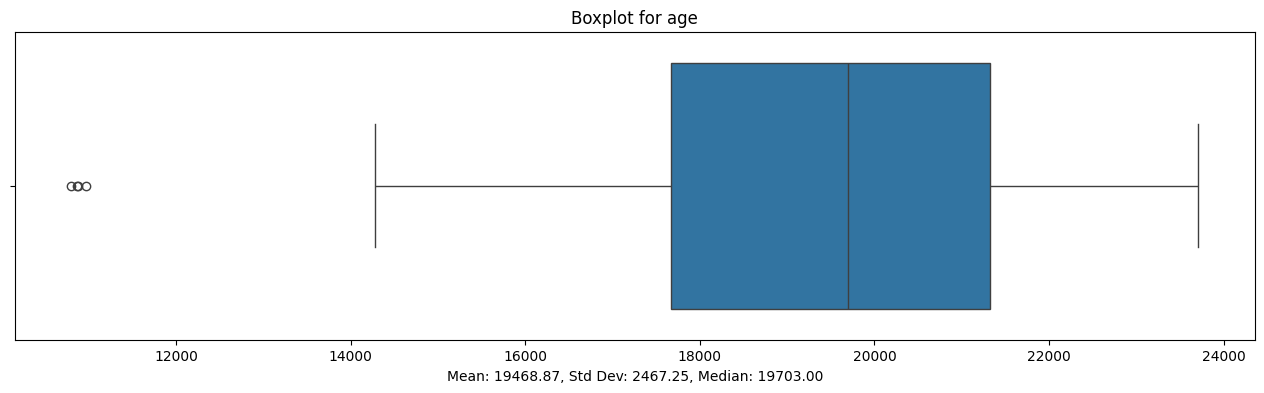

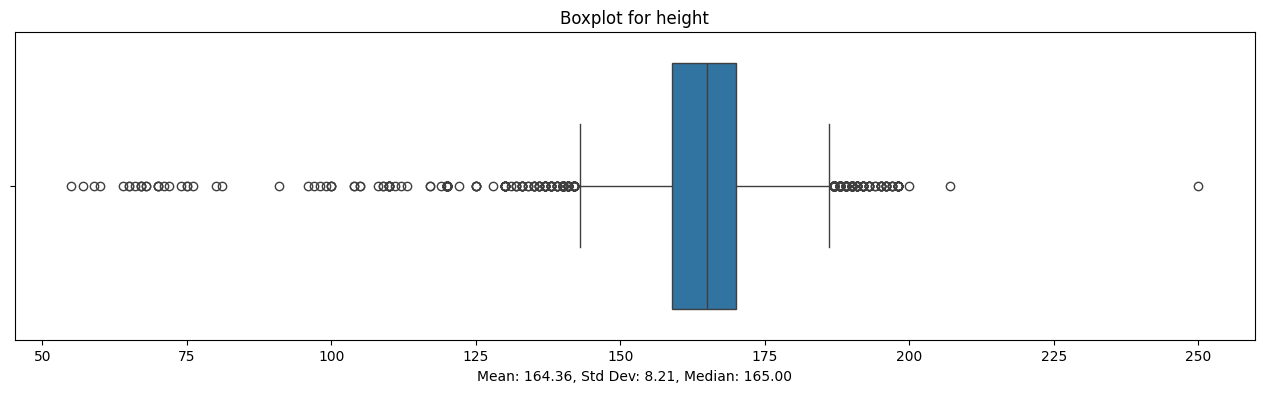

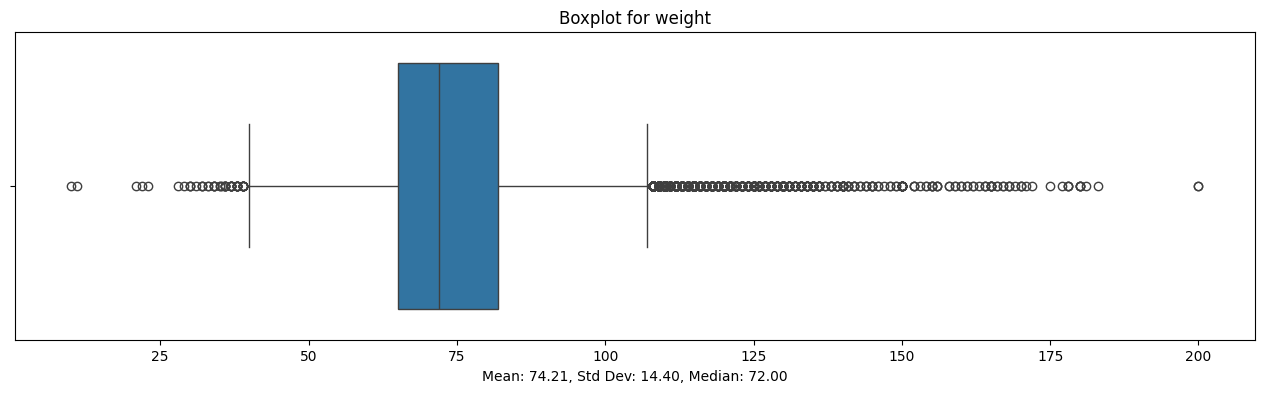

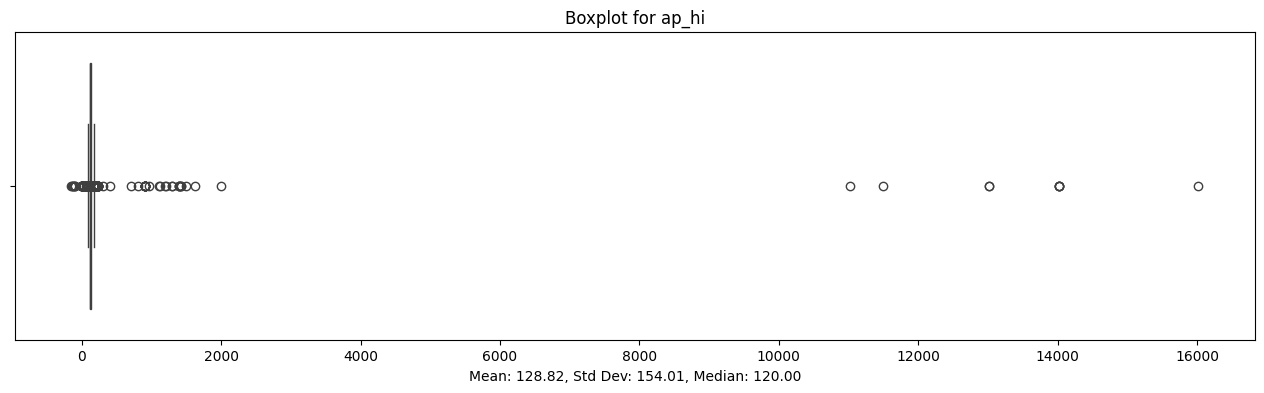

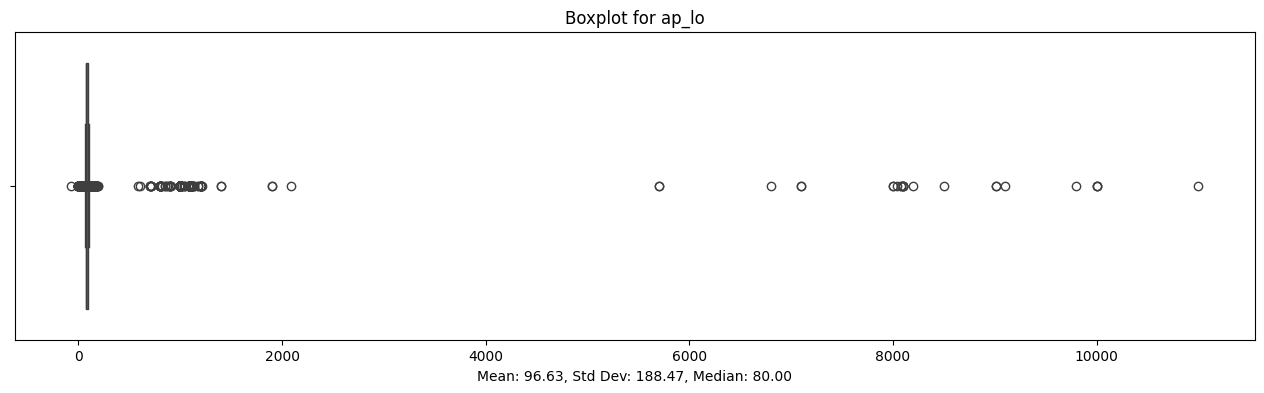

In [9]:
num_attributes = ["age", "height", "weight", "ap_hi", "ap_lo"]
# Extract numerical attributes from the dataset


# Boxplot of the numeric data
for var in data[num_attributes]:                          # iterate over numerical attributes
    fig, axes = plt.subplots(1, 1, figsize=(16,4))  # setup the frame of the plot
    sb.boxplot(data=data, x=var, orient='h') 
     
    # Calculate and print the statistics
    mean = data[var].mean()
    std = data[var].std()
    median = data[var].median()

    # Print the statistics below each plot
    stats_text = f"Mean: {mean:.2f}, Std Dev: {std:.2f}, Median: {median:.2f}"
    plt.xlabel(stats_text)  # Use xlabel to display the stats under the boxplot

    plt.title(f"Boxplot for {var}")
    plt.show()  # Display the plot
    
    
    

In [10]:
# Convert the data in the 'age' column from days to years
data['age'] = (data['age'] / 365).round().astype('int')

### 3.1.2. Handling Outliers

From the boxplot of ap_hi and ap_lo, a number of outliers can be observed as the Systolic and Diastolic Blood pressure is bounded between 80-200mmHg and 40-140mmHg respectively and there are many entries that are out of this range. Values outside of this range should be impossible. Therefore we should remove such values. 


In [11]:
ap_hi = data['ap_hi']
ap_lo = data['ap_lo']

# Print number of unusual training examples
print("number of outliers:")
data["cardio"].loc[(ap_hi < 80) | (ap_hi > 200) | (ap_lo < 40) | (ap_lo > 140)].count()



number of outliers:


1320

Since there are only 1320 outliers, we will go ahead and remove them

In [12]:
indices_to_drop = data.loc[(data['ap_hi'] < 80) | (data['ap_hi'] > 200) | (data['ap_lo'] < 40) | (data['ap_lo'] > 140)].index

# Then, drop these rows from the DataFrame
data = data.drop(indices_to_drop)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68680 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68680 non-null  int32  
 1   gender       68680 non-null  int64  
 2   height       68680 non-null  int64  
 3   weight       68680 non-null  float64
 4   ap_hi        68680 non-null  int64  
 5   ap_lo        68680 non-null  int64  
 6   cholesterol  68680 non-null  int64  
 7   gluc         68680 non-null  int64  
 8   smoke        68680 non-null  int64  
 9   alco         68680 non-null  int64  
 10  active       68680 non-null  int64  
 11  cardio       68680 non-null  int64  
dtypes: float64(1), int32(1), int64(10)
memory usage: 6.5 MB


Looking at the boxplot of height and weight, there seems to be many outliers. However, the values of the outliers is still reasonable, and so we will not remove them.

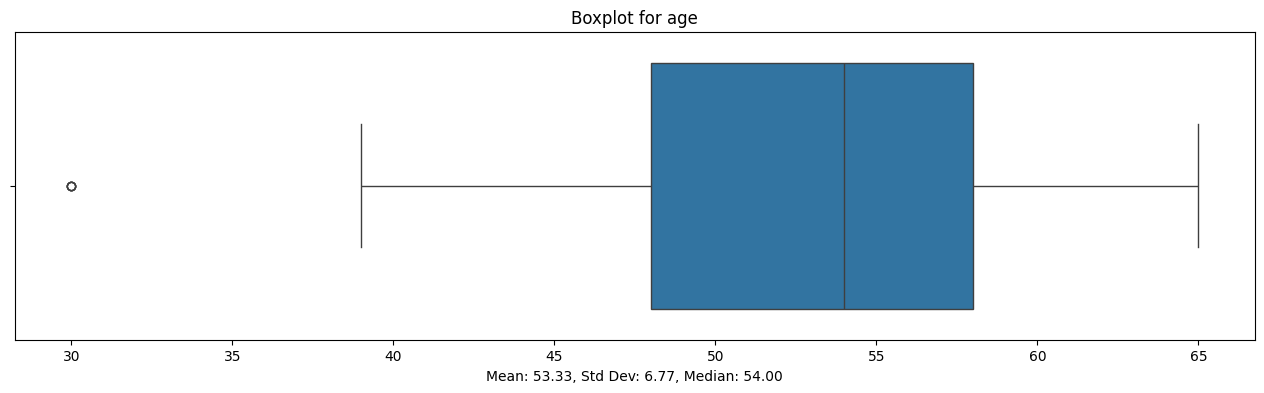

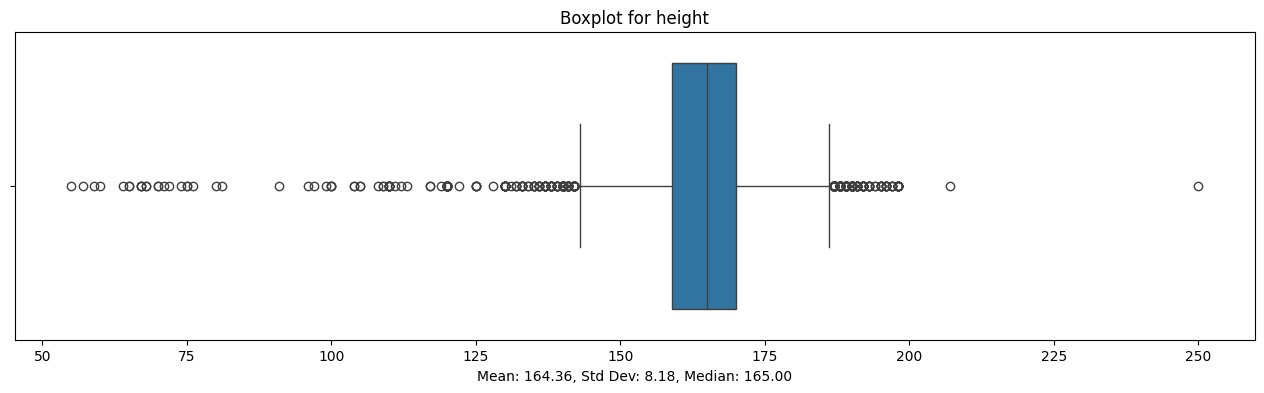

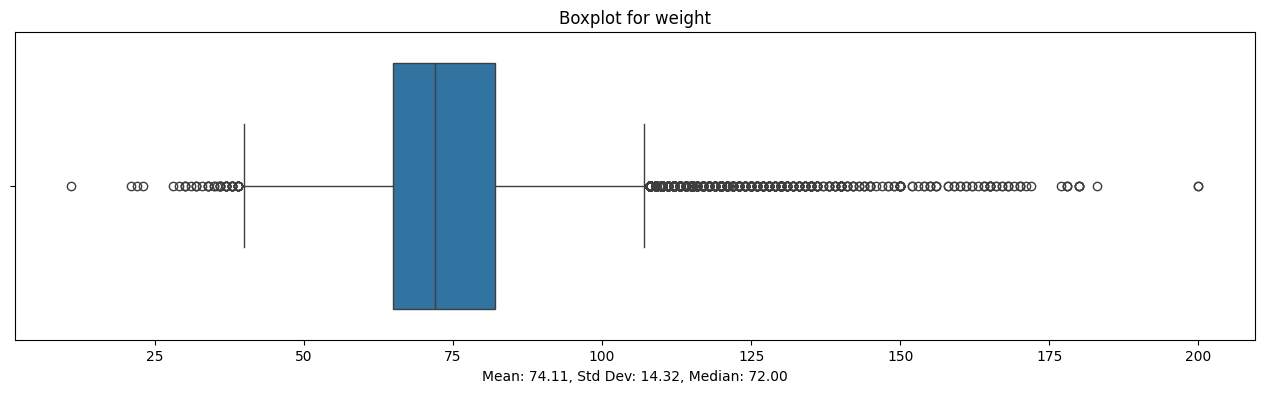

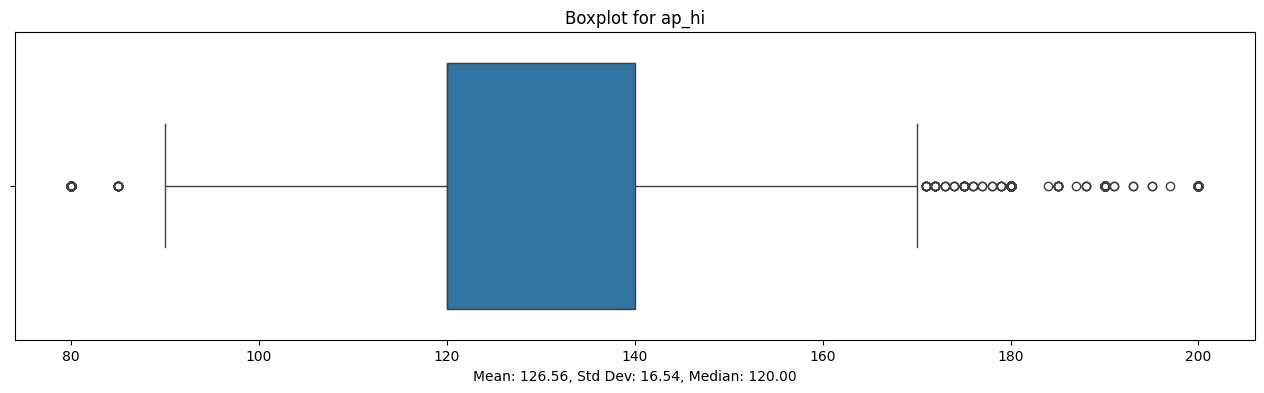

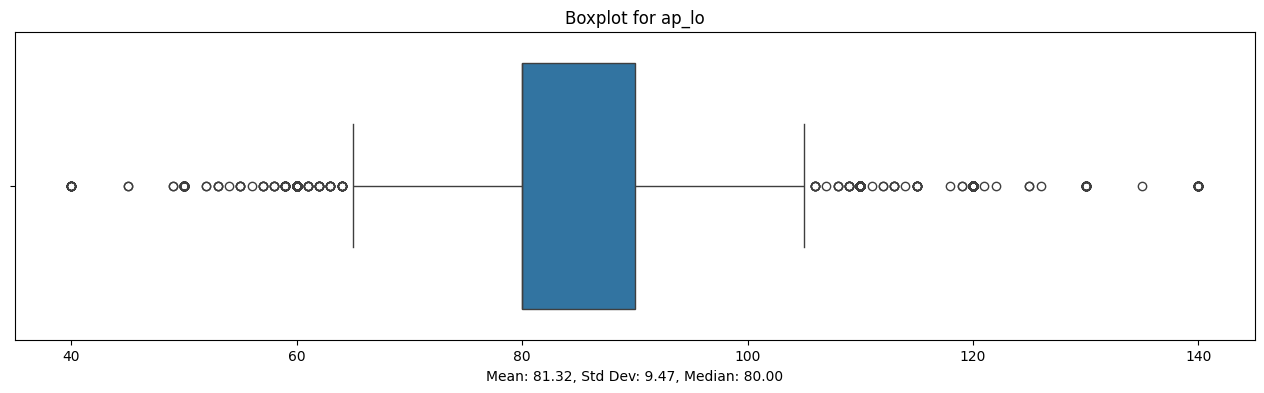

In [13]:
# printing the new boxplot after cleaning up
for var in num_attributes:                          
    fig, axes = plt.subplots(1, 1, figsize=(16,4))  
    sb.boxplot(data=data, x=var, orient='h') 
    
    # Calculate and print the statistics
    mean_clean = data[var].mean()
    std_clean = data[var].std()
    median_clean = data[var].median()

    # Print the statistics below each plot
    stats_text = f"Mean: {mean_clean:.2f}, Std Dev: {std_clean:.2f}, Median: {median_clean:.2f}"
    plt.xlabel(stats_text)  # Use xlabel to display the stats under the boxplot

    plt.title(f"Boxplot for {var}")
    plt.show()  # Display the plot

### 3.2 Categorical Data

In [56]:
cat_attributes = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
#making a list of categorical attributes

In [57]:
catDF = pd.DataFrame(data[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']])

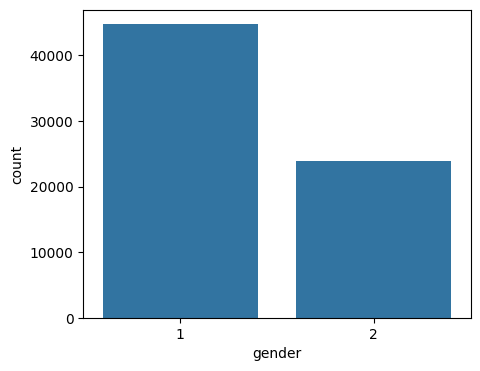

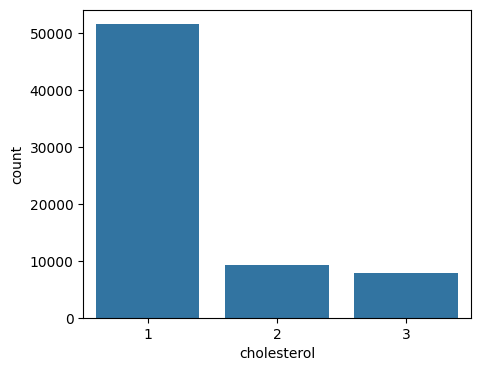

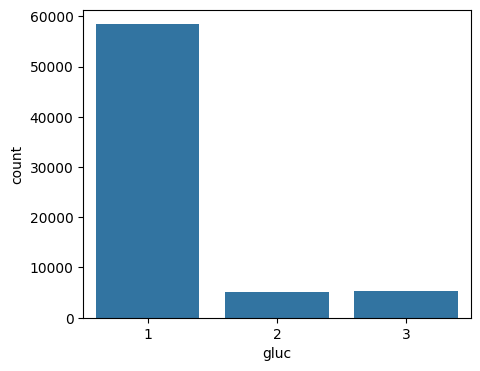

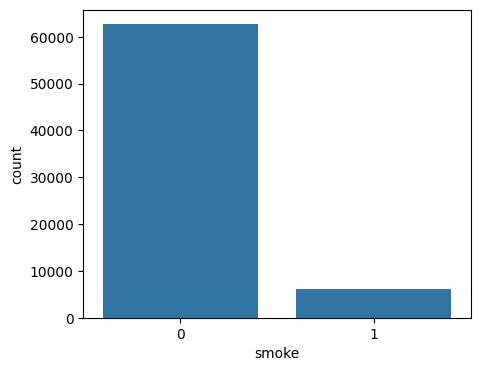

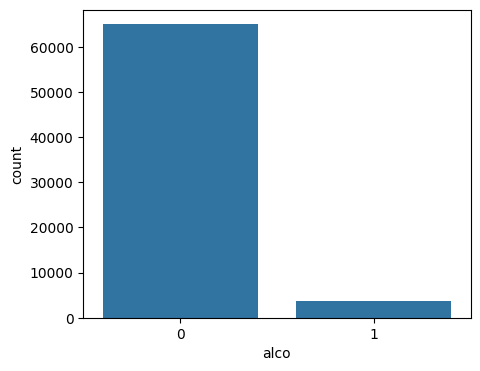

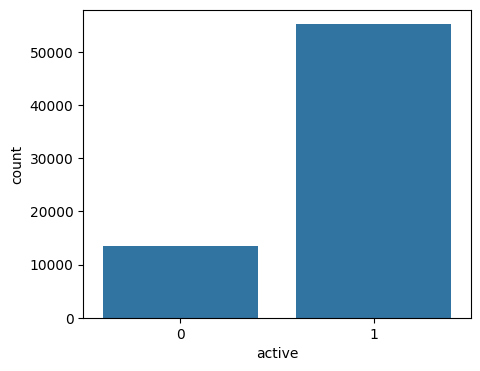

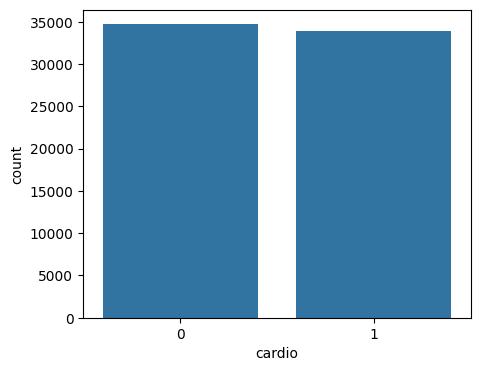

In [58]:
for var in data[cat_attributes]: # iterate over categorical attributes, and plotting the countplot for each of them
  fig, axzes = plt.subplots(1, 1, figsize=(5,4)) 
  sb.countplot(data=catDF, x=var, orient='h')

Based on the countplot, Majority of the entries are:
1. Woman
2. Have normal cholesterol levels
3. Have normal glucose levels
4. Do not smoke
5. Do not consume alcohol
6. Are inactive

We'll explore using one hot encoding to convert cholesterol and glucose columns to True/False instead of keeping it as 1,2,3. One hot encoding is a process used to convert categorical data variables into a form that could be provided to machine learning algorithms to do a better job in prediction. Many machine learning algorithms can misunderstand numerical data to be ordinal (i.e., having some sort of order or hierarchy), even if it is categorical, and has no inherent order. One hot encoding removes this potential source of error by representing the data in a binary format that does not imply order.

In [59]:
data_encoded = pd.get_dummies(data, columns=['gluc', 'cholesterol'])

In [60]:
data_encoded.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gluc_1,gluc_2,gluc_3,cholesterol_1,cholesterol_2,cholesterol_3
0,50,2,168,62.0,110,80,0,0,1,0,True,False,False,True,False,False
1,55,1,156,85.0,140,90,0,0,1,1,True,False,False,False,False,True
2,52,1,165,64.0,130,70,0,0,0,1,True,False,False,False,False,True
3,48,2,169,82.0,150,100,0,0,1,1,True,False,False,True,False,False
4,48,1,156,56.0,100,60,0,0,0,0,True,False,False,True,False,False


We will now remove the cholesterol and glucose columns from cat_attributes and data. We will also remove "cholesterol_3" and "gluc_3" because the dropped column's information is not lost—it's implicitly encoded in the other columns.

In [61]:
#adding the new variables to the list of categorical attributes
cat_attributes.remove('cholesterol')
cat_attributes.remove('gluc')

cat_attributes.extend(['cholesterol_2', 'cholesterol_1', 'gluc_2', 'gluc_1'])
#converting "True" and "False" into 1 and 0 for the new variables
data_encoded['gluc_2'] = data_encoded['gluc_2'].astype(int)
data_encoded['gluc_1'] = data_encoded['gluc_1'].astype(int)
data_encoded['cholesterol_2'] = data_encoded['cholesterol_2'].astype(int)
data_encoded['cholesterol_1'] = data_encoded['cholesterol_1'].astype(int)

data = data_encoded
print(cat_attributes)


['gender', 'smoke', 'alco', 'active', 'cardio', 'cholesterol_2', 'cholesterol_1', 'gluc_2', 'gluc_1']


In [62]:
data = data_encoded
data_encoded.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gluc_1,gluc_2,gluc_3,cholesterol_1,cholesterol_2,cholesterol_3
0,50,2,168,62.0,110,80,0,0,1,0,1,0,False,1,0,False
1,55,1,156,85.0,140,90,0,0,1,1,1,0,False,0,0,True
2,52,1,165,64.0,130,70,0,0,0,1,1,0,False,0,0,True
3,48,2,169,82.0,150,100,0,0,1,1,1,0,False,1,0,False
4,48,1,156,56.0,100,60,0,0,0,0,1,0,False,1,0,False


# 4. Exploratory Analysis

### 4.1Numerical Analysis

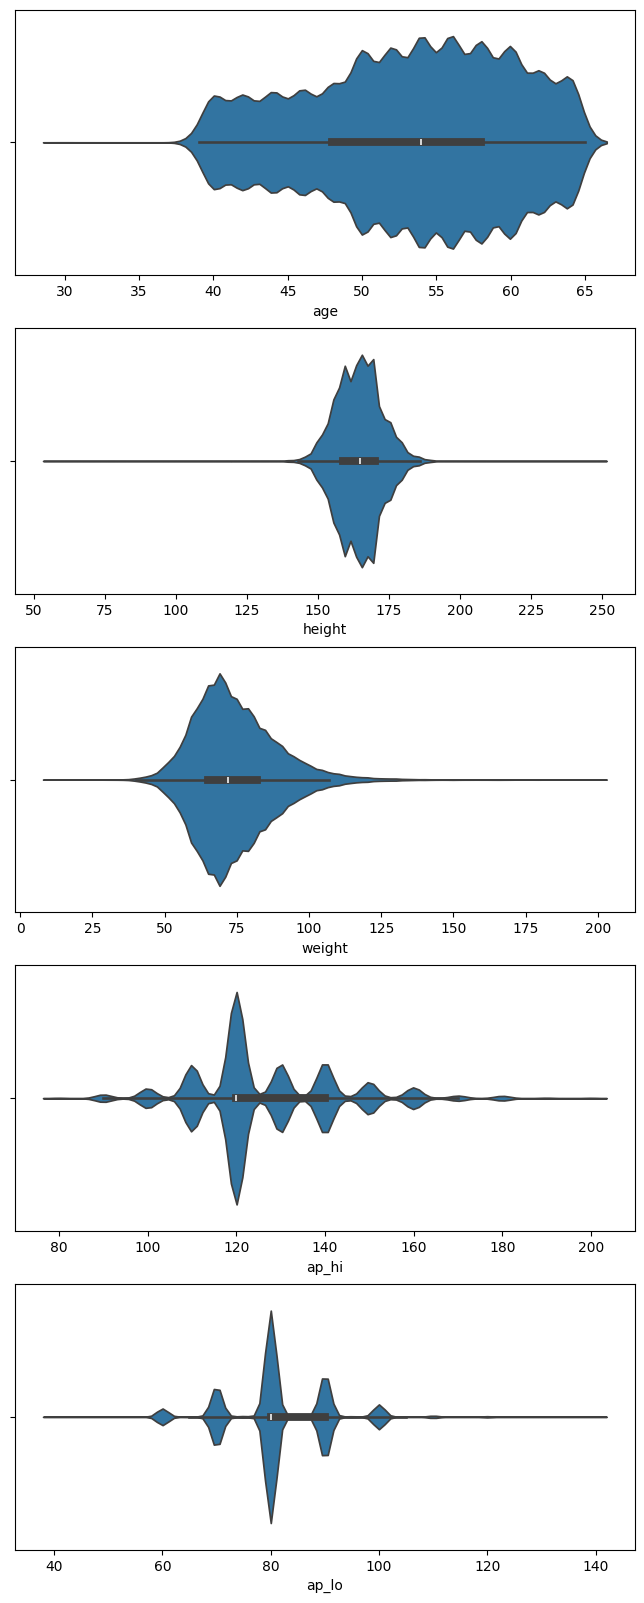

In [63]:
fig , ax = plt.subplots(nrows = len(num_attributes), figsize = (8,20))
count = 0
for number in num_attributes:
    sb.violinplot(data = data, x =number, ax = ax[count])
    count +=1
#plotting the different numerical attributes against cardio

Looking at the new boxplot the majority of the entries are:<br>
- Between the ages of 39 and 65 years old<br> 
- Between the heights of 140cm and 188cm<br>
- Between the weights of 40kg and 110kg
- ap_hi between 90mmHg and 170mmHg
- ap_lo between 65mmHg and 105mmHg

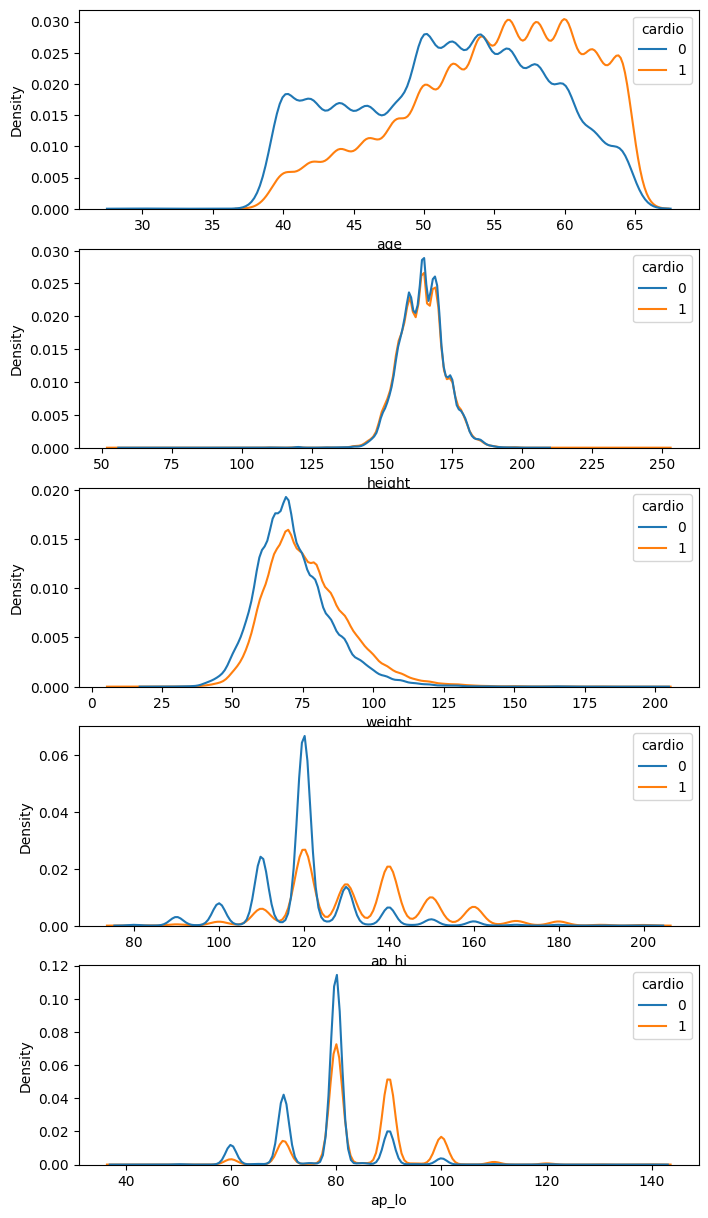

In [64]:
fig , ax = plt.subplots(nrows = len(num_attributes), figsize = (8,15))
count = 0
for number in num_attributes:
    sb.kdeplot(data = data, x =number, hue = "cardio", ax = ax[count])
    count +=1
#plotting the different numerical attributes against cardio

<Axes: >

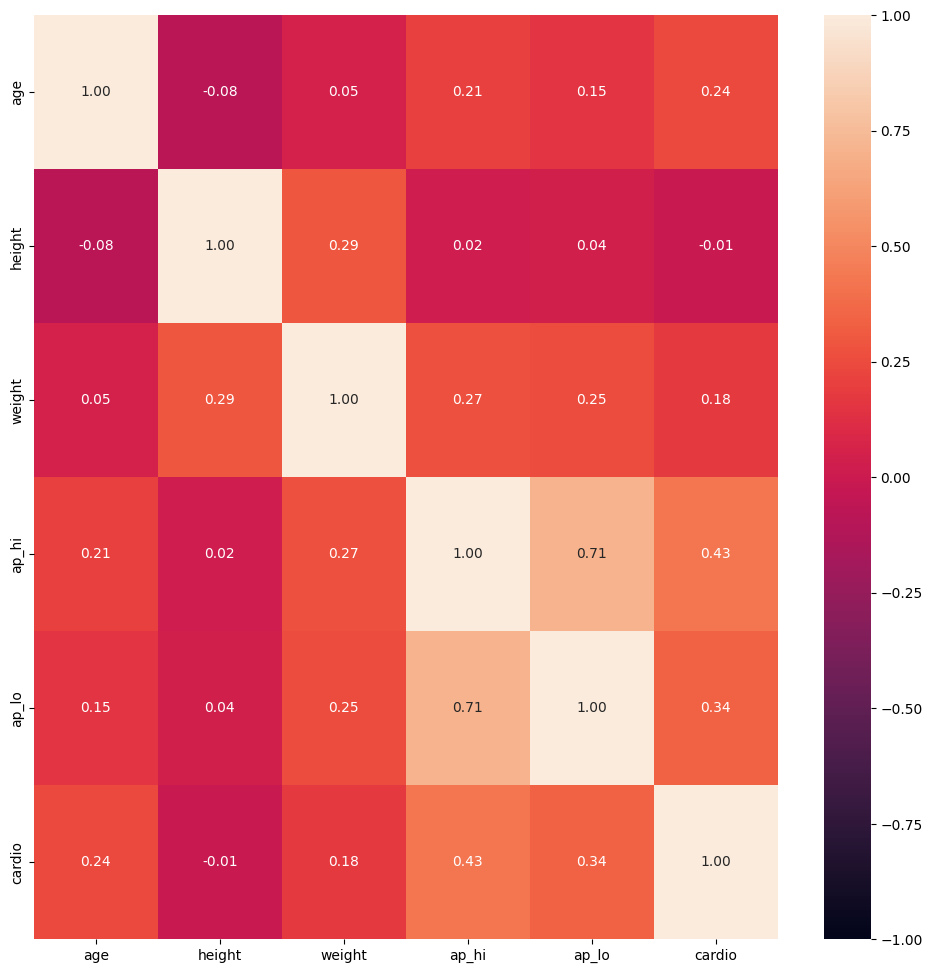

In [24]:
f = plt.figure(figsize=(12, 12))
num_attributes.append("cardio")
sb.heatmap(data[num_attributes].corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Based on the KDE plot, There seem to be a strong correlation between age, ap_hi and ap_lo against cardio, whereas there is a weaker correlation between height and weight against cardio. This is further shown with the correlation heatmap, where the correlation for height and weight against cardio is low, while that of age ,ap_hi and ap_lo is higher.

### 4.2. Categorical Exploration

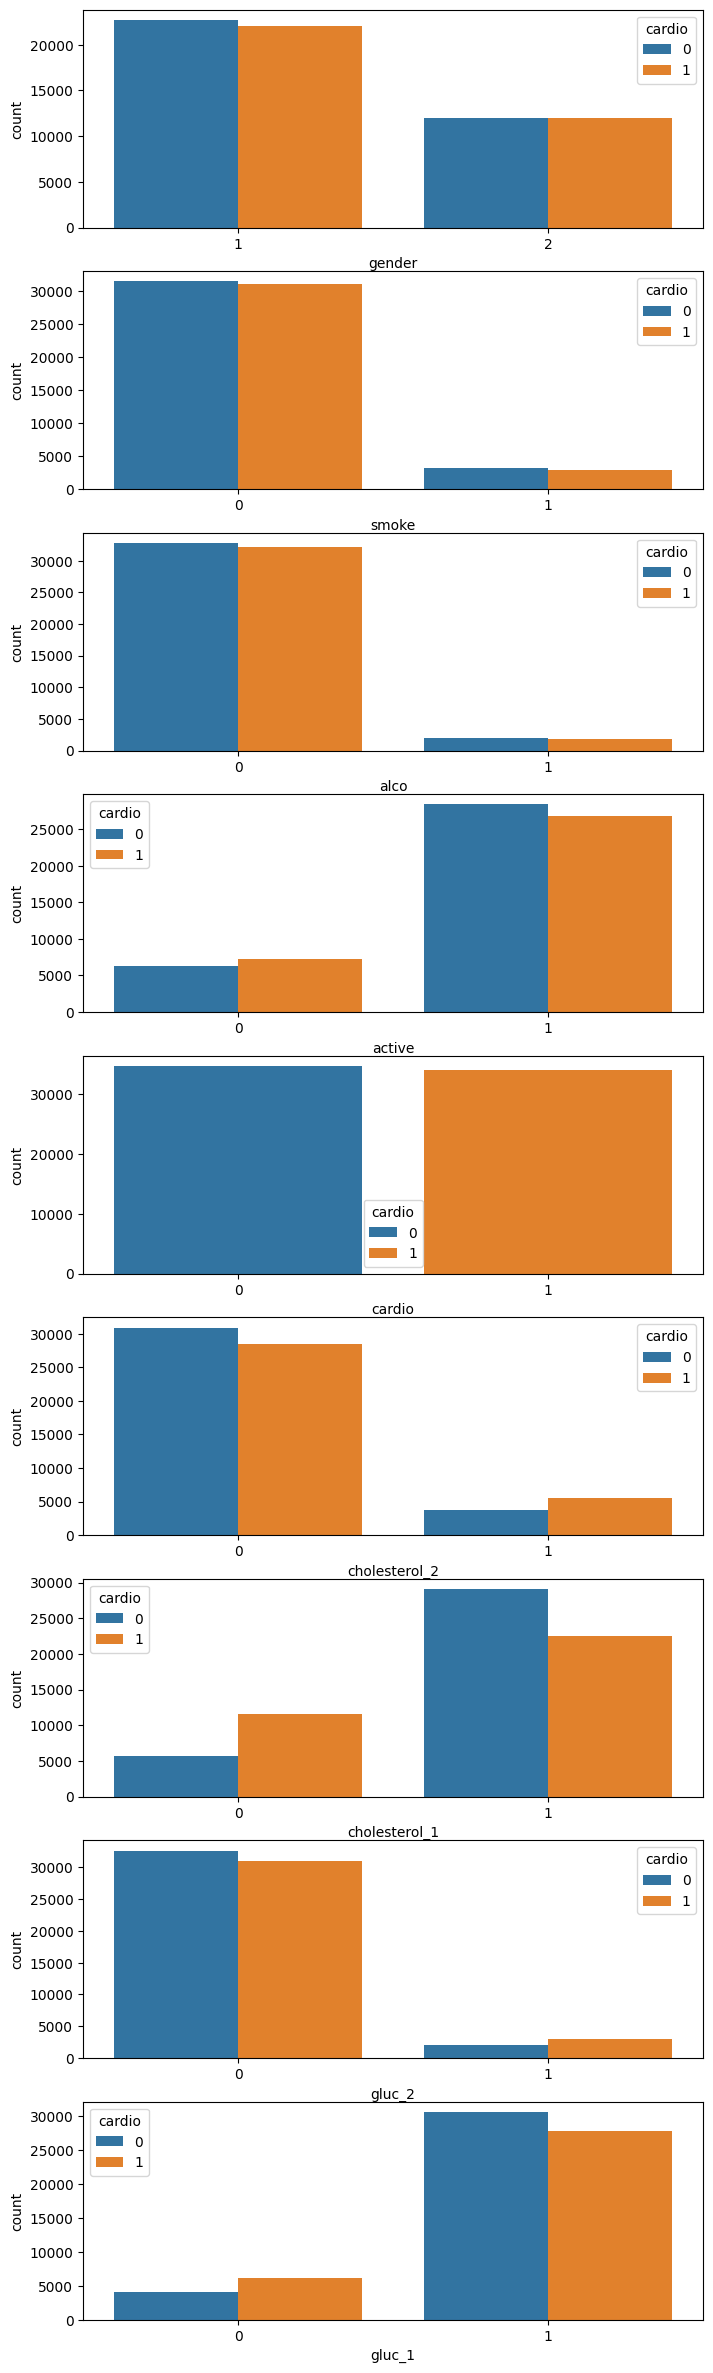

In [25]:
fig , ax = plt.subplots(nrows = len(cat_attributes), figsize = (8,30))
count = 0
for number in cat_attributes:
    sb.countplot(data = data, x =number, hue = "cardio", ax = ax[count])
    count +=1
#plotting a countplot of every categorical attribute against cardio

<Axes: >

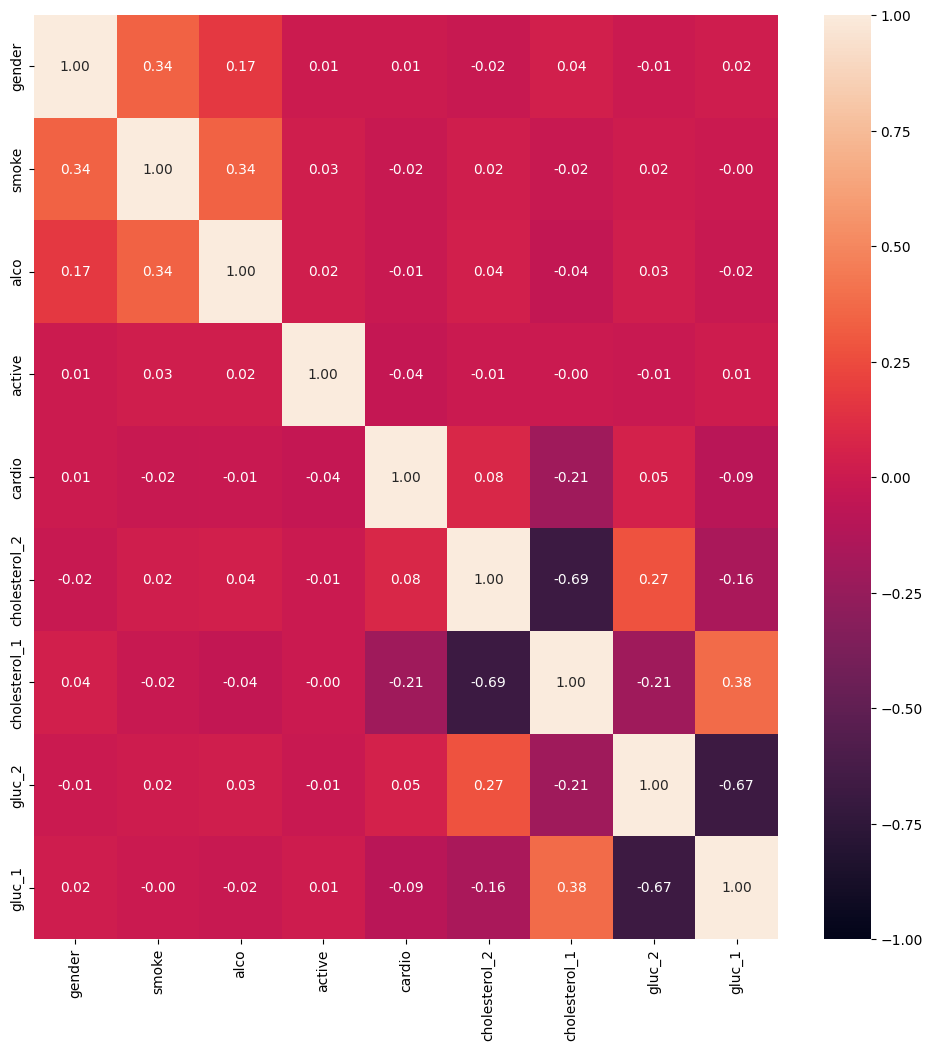

In [26]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(data[cat_attributes].corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Looking at the countplots and the correlation heatmap, gender seems to have a weak correlation with cardio.
Although the correlation of cholesterol and glucose levels with cardio are low, the likelyhood of a person having cardio seems to increase as the cholesterol and glucose level becomes irregular.
Whether a person is physically active, smokes or consumes alcohol does not seem to have an effect on whether a person has cardiovascular disease.

### 4.3. Feature Engineering

With Height and Weight having weak correlation with cardio, we can try combining the 2 attributes into body mess index(bmi), which is a measure that is commonly used to assess whether a person has a healthy body weight for a given height. It's calculated by dividing a person's weight in kilograms by the square of their height in meters.s
​


<Axes: xlabel='bmi', ylabel='Density'>

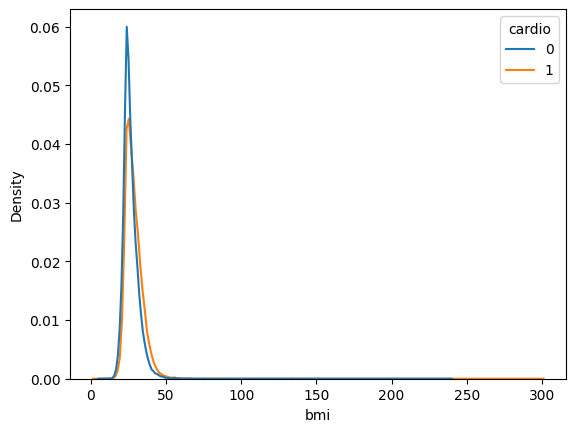

In [27]:
data['bmi'] = data['weight']/((data['height']/100)**2)
sb.kdeplot(data = data, x ='bmi',hue = 'cardio')


As the proportion of entries with CVD becomes higher as bmi increases, "bmi" seems to have a greater impact on whether a person has CVD.

We can also form a new variable, Mean Arterial Pressure (MAP). MAP is the average pressure in a patient's arteries during one cardiac cycle. It is a measure of perfusion pressure, indicating the average pressure that drives blood from the heart to the rest of the body.

53 160


<Axes: xlabel='map', ylabel='Density'>

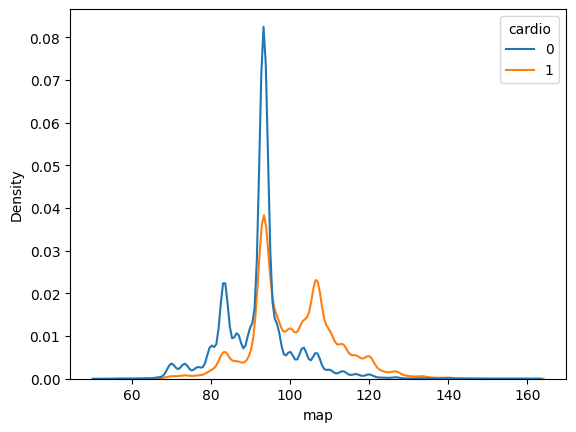

In [28]:
# Calculate Mean Arterial Pressure (MAP) using the formula: ((2 * ap_lo) + ap_hi) / 3
data['map'] = ((2 * data['ap_lo']) + data['ap_hi']) / 3

# Find the minimum and maximum MAP values
mapMin = int(data['map'].min())
mapMax = int(data['map'].max())

# Print the minimum and maximum MAP values
print(mapMin, mapMax)

sb.kdeplot(data = data, x = 'map', hue = "cardio")


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68680 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            68680 non-null  int32  
 1   gender         68680 non-null  int64  
 2   height         68680 non-null  int64  
 3   weight         68680 non-null  float64
 4   ap_hi          68680 non-null  int64  
 5   ap_lo          68680 non-null  int64  
 6   smoke          68680 non-null  int64  
 7   alco           68680 non-null  int64  
 8   active         68680 non-null  int64  
 9   cardio         68680 non-null  int64  
 10  gluc_1         68680 non-null  int32  
 11  gluc_2         68680 non-null  int32  
 12  gluc_3         68680 non-null  bool   
 13  cholesterol_1  68680 non-null  int32  
 14  cholesterol_2  68680 non-null  int32  
 15  cholesterol_3  68680 non-null  bool   
 16  bmi            68680 non-null  float64
 17  map            68680 non-null  float64
dtypes: bool(2),

In [30]:
data[['bmi', 'cardio','map']].corr()

,bmi,cardio,map
bmi,1.000000,0.164164,0.237455
cardio,0.164164,1.000000,0.411456
map,0.237455,0.411456,1.000000


There seems to be a strong correlation between MAP and CVD

Now we will scale our numeric variables. We will do this because different features often have different units and scales.
Scaling ensures these features contribute equally to the model's computation, preventing features with larger scales from dominating those with smaller scales.


In [31]:
from sklearn.preprocessing import StandardScaler

# Define scaler object
scaler = StandardScaler()
num_attribs = ["age","bmi","map","height","weight","ap_hi","ap_lo"]
# Scale numerical attributes
data[num_attribs] = scaler.fit_transform(data[num_attribs])

#### 4.5 Feature Selection

### 4.5.1. 


Before proceeding with Feature Selection, we will first choose our metric to evaluate the importance of the features and also the effectiveness of the models. We have chosen to use recall score for class 1, which represents "cardio" = true. We want to minimise the number of false negatives, as the consequence of false negatives(a person predicted to not need a checkup even though he/she have CVD) are more detrimental than that of false positives(a person predicted to need a checkup even though he/she does not have CVD). 

Recall is a performance metric for classification models that measures the fraction of the total amount of relevant instances that were actually retrieved. In other words, it answers the question: "Out of all the actual positives, how many did the model correctly identify?" Recall = TP/(TP+FN).
A high recall score indicates that an algorithm returned most of the relevant results, making it an important metric in cases where missing out on a positive case has serious implications such as wrong disease diagnosis.

### 4.5.2

We will now use Recursive Feature Elimination(RFE) to rank the importance of each feature. RFE aims to select features by recursively considering smaller and smaller sets of features. 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Separate the features and target variable
X = data.drop(['cardio'], axis=1)
y = data['cardio']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest regressor
rf = RandomForestRegressor(random_state=42)


In [36]:
rfe = RFE(estimator=rf, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=1)

In [37]:
# Create a DataFrame to display feature rankings
feature_ranking = pd.DataFrame({'Feature': X_train.columns,
                                 'Ranking': rfe.ranking_}).sort_values(by="Ranking")

print("Feature Ranking (1 indicates selected features):")
print(feature_ranking)

Feature Ranking (1 indicates selected features):
          Feature  Ranking
15            bmi        1
4           ap_hi        2
0             age        3
3          weight        4
2          height        5
16            map        6
1          gender        7
5           ap_lo        8
14  cholesterol_3        9
9          gluc_1       10
8          active       11
12  cholesterol_1       12
6           smoke       13
13  cholesterol_2       14
7            alco       15
10         gluc_2       16
11         gluc_3       17


Now that we have the ranking of the features, we will run a for loop with different number of features used for the models each loop, and find that gives the highest recall score.

Using features: ['bmi']
Accuracy: 0.557
Recall: 0.488
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.62      0.59      6921
           1       0.56      0.49      0.52      6815

    accuracy                           0.56     13736
   macro avg       0.56      0.56      0.55     13736
weighted avg       0.56      0.56      0.55     13736

--------------------------------------------------------------------------------
Using features: ['bmi', 'ap_hi']
Accuracy: 0.673
Recall: 0.589
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      6921
           1       0.70      0.59      0.64      6815

    accuracy                           0.67     13736
   macro avg       0.68      0.67      0.67     13736
weighted avg       0.68      0.67      0.67     13736

--------------------------------------------------------------------------------
Using features: ['bmi

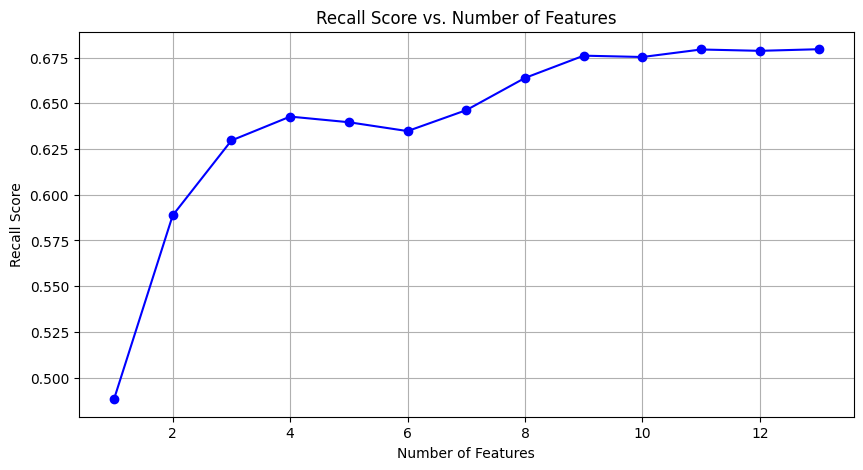

In [38]:
from sklearn.metrics import recall_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# We first make a sorted list of the attributes
attribute_sorted = ["bmi", "ap_hi", "age", "map", "gender", "ap_lo", "active", "cholesterol_1", "gluc_1", "smoke", "cholesterol_2", "alco", "gluc_2"]
recall_scores = []


for i in range(1, len(attribute_sorted) + 1):
    # Create a subset of features up to the ith feature
    subset_features = attribute_sorted[:i]
    X = data[subset_features]  # Use the actual data for the features
    y = data['cardio']  

    # Splitting the dataset into training and testing sets
    X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model_forest = RandomForestClassifier(random_state=42)
    rf_model_forest.fit(X_train_forest, y_train_forest)

    y_pred_forest = rf_model_forest.predict(X_test_forest)
    # Evaluating the Test model
    accuracy = accuracy_score(y_test_forest, y_pred_forest)
    recall = recall_score(y_test_forest, y_pred_forest)
    report = classification_report(y_test_forest, y_pred_forest)
    recall_scores.append(recall)

    print("Using features:", subset_features)
    print(f"Accuracy: {accuracy:.3f}")  # Formats the accuracy to three decimal places
    print(f"Recall: {recall:.3f}")  # Formats the recall to three decimal places
    print("Classification Report:")
    print(report)
    print("-" * 80)  # This will print a line to separate reports
    
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(attribute_sorted) + 1), recall_scores, marker='o', linestyle='-', color='b')
plt.title('Recall Score vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Recall Score')
plt.grid(True)
plt.show()

Based on the report, The highest recall score is when all the features are included, so we will be using all the features in our model.

In [39]:
final_attributes = ["bmi", "ap_hi", "age", "map", "gender", "ap_lo", "active", "cholesterol_1", "gluc_1", "smoke", "cholesterol_2", "alco", "gluc_2"]

# 5. Machine Learning Models

### 5.1 Random Forest

Random Forest is a machine learning algorithm that constructs a multitude of decision trees at training time and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random forest corrects for decision trees' habit of overfitting to their training set by introducing randomness in the tree building process. Each tree in the forest is built from a random sample of the data, and at each node, a random subset of the features are considered for splitting.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

In [35]:
def RandomForestSplit(X, y):
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Returns the split data
    return X_train, X_test, y_train, y_test

In [36]:
data_without_cardio = data.drop("cardio", axis=1)
X= data_without_cardio
y= data['cardio']
X_train_forest, X_test_forest, y_train_forest, y_test_forest = RandomForestSplit(X,y)


rf_model_forest = RandomForestClassifier(random_state=42)
rf_model_forest.fit(X_train_forest, y_train_forest)

# Evaluating the Test model
report = classification_report(y_test_forest, y_pred_forest)

print ("Test set \n")
print("Report: \n") 
print (report)

Test set 

Report: 

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      6921
           1       0.68      0.68      0.68      6815

    accuracy                           0.68     13736
   macro avg       0.68      0.68      0.68     13736
weighted avg       0.68      0.68      0.68     13736



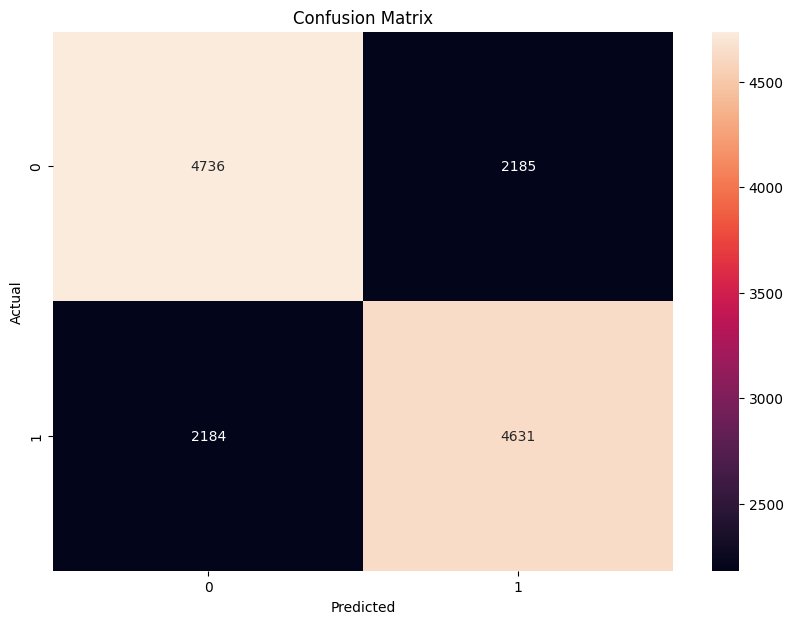

In [37]:
from sklearn.metrics import confusion_matrix
# Assuming y_test and y_train_pred are already defined and contain the true and predicted labels.
cm = confusion_matrix(y_test_forest, y_pred_forest)

# Create a heatmap with annotations
plt.figure(figsize=(10, 7))  # You can adjust the size as needed
sb.heatmap(cm, annot=True, fmt='d')  # The 'fmt' argument ensures numbers are displayed as integers

# Optional: Add labels for clarity
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

We get a recall score of 0.68 for class 1, with 2184 False Negatives.

**Now, let's enhance the Random forest with grid search**

We will only use the train set for grid search

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer

In [39]:
# Create a custom scorer that calculates recall for the positive class
recall_scorer = make_scorer(recall_score, pos_label=1)

In [40]:
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10],}

In [41]:
GS_forest = GridSearchCV(estimator=rf_model_forest, param_grid=param_grid, cv=5, scoring=recall_scorer, n_jobs=-1)

In [42]:
#we search the training data only
GS_forest.fit(X_train_forest, y_train_forest)
print("Best Parameters:", GS_forest.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 200}


In [43]:
#evaluate best model on test
# Start timing the predict operation
best_model_forest = GS_forest.best_estimator_
start_fit_time_RF = time.time()
best_model_forest.fit(X_train_forest, y_train_forest)
end_fit_time_RF = time.time()
# Calculate the time taken to fit the model
fit_time_RF = end_fit_time_RF - start_fit_time_RF


# Start timing the predict operation
start_predict_time_RF = time.time()
y_pred_forest_grid = best_model_forest.predict(X_test_forest)
end_predict_time_RF = time.time()
# Calculate the time taken to predict
predict_time_RF = end_predict_time_RF - start_predict_time_RF

test_classReport_forest_grid = classification_report(y_test_forest, y_pred_forest_grid)

# Print results with timing
print(f"Fit time: {fit_time_RF:.3f} seconds")
print(f"Predict time: {predict_time_RF:.3f} seconds")

print(test_classReport_forest_grid)

Fit time: 14.171 seconds
Predict time: 0.680 seconds
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      6921
           1       0.71      0.69      0.70      6815

    accuracy                           0.70     13736
   macro avg       0.70      0.70      0.70     13736
weighted avg       0.70      0.70      0.70     13736



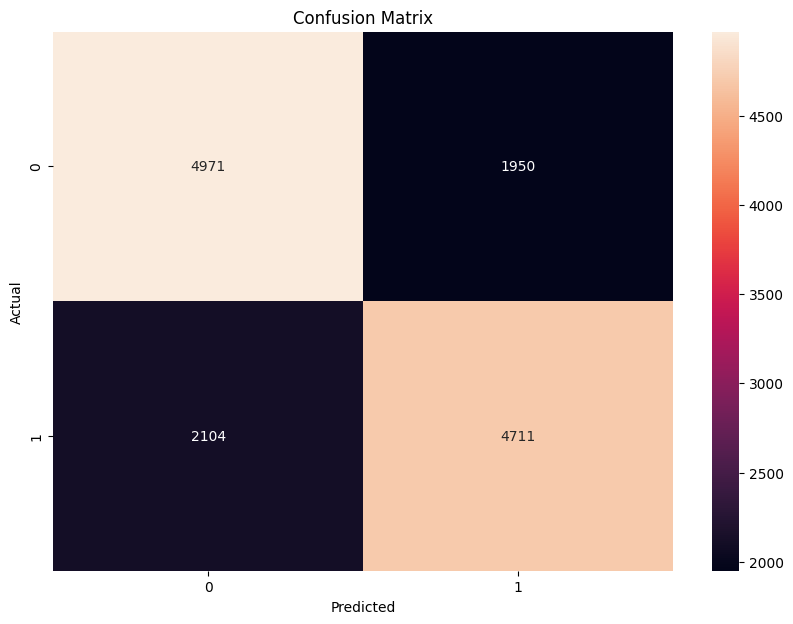

In [44]:
from sklearn.metrics import confusion_matrix
# Assuming y_test and y_train_pred are already defined and contain the true and predicted labels.
cm = confusion_matrix(y_test_forest, y_pred_forest_grid)

# Create a heatmap with annotations
plt.figure(figsize=(10, 7))  # You can adjust the size as needed
sb.heatmap(cm, annot=True, fmt='d')  # The 'fmt' argument ensures numbers are displayed as integers

# Optional: Add labels for clarity
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

We managed to increase the recall score to 0.69 for class 1, and reduced the number of False Negatives to 2104. 

### 5.2 K-Nearest-Neighbours


We will now use the next model we selected, KNN. KNN is a non-parametric algorithm, meaning it does not make any assumptions about the underlying distribution of the data. Instead, it relies on the distances between data points to make predictions. It is a supervised machine learning algorithm that can be used to solve both classification and regression problems using feature similarity.

In [45]:
KDF = pd.DataFrame(data[["bmi", "ap_hi", "age", "map", "gender", "ap_lo", "active", "cholesterol_1", "gluc_1", "smoke", "cholesterol_2", "alco", "gluc_2","cardio"]])

In [46]:
X = KDF.iloc[:,:-1]
y = KDF.iloc[:,-1]

In [47]:
# Split the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
KNN = KNeighborsClassifier(n_neighbors = 5)

In [50]:
from sklearn.metrics import precision_recall_fscore_support,confusion_matrix
from sklearn.metrics import classification_report

KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.70      0.71      0.70      6921
           1       0.70      0.68      0.69      6815

    accuracy                           0.70     13736
   macro avg       0.70      0.70      0.70     13736
weighted avg       0.70      0.70      0.70     13736



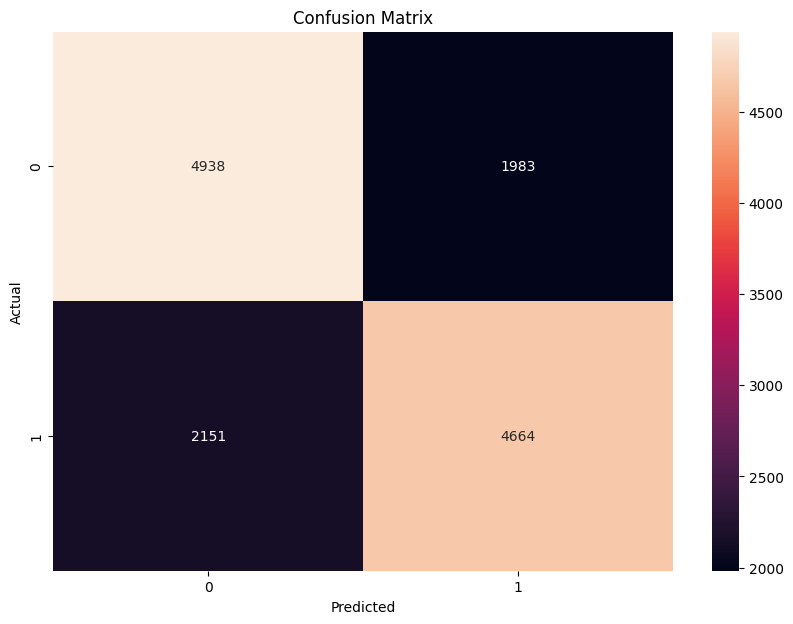

In [51]:

# Assuming y_test and y_train_pred are already defined and contain the true and predicted labels.
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap with annotations
plt.figure(figsize=(10, 7))  # You can adjust the size as needed
sb.heatmap(cm, annot=True, fmt='d')  # The 'fmt' argument ensures numbers are displayed as integers

# Optional: Add labels for clarity
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

We get a recall score of 0.68 for class 1, with 2151 False Negatives.

**We will now enhance the model with grid search, in an attempt to optimise the recall score of class 1.**

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer
# Create a KNN estimator
KNN = KNeighborsClassifier()

# Create a custom scorer that calculates recall for the positive class
recall_scorer = make_scorer(recall_score, pos_label=1)

# Set up GridSearchCV to optimize for recall
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5, scoring=recall_scorer)



In [53]:
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11}


In [54]:
best_model_KNN = grid_search.best_estimator_
start_fit_time_KNN = time.time()
best_model_KNN.fit(X_train,y_train)
end_fit_time_KNN = time.time()
fit_time_KNN = end_fit_time_KNN - start_fit_time_KNN
start_predict_time_KNN = time.time()
y_pred_KNN_grid = best_model_KNN.predict(X_test)
end_predict_time_KNN = time.time()
predict_time_KNN = end_predict_time_KNN - start_predict_time_KNN
# Print results with timing
print(f"Fit time: {fit_time_KNN:.3f} seconds")
print(f"Predict time: {predict_time_KNN:.3f} seconds")
# Assuming 'y_true' and 'y_pred' are the true and predicted labels
print(classification_report(y_test, y_pred_KNN_grid))

Fit time: 0.126 seconds
Predict time: 1.695 seconds
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      6921
           1       0.73      0.69      0.71      6815

    accuracy                           0.72     13736
   macro avg       0.72      0.72      0.72     13736
weighted avg       0.72      0.72      0.72     13736



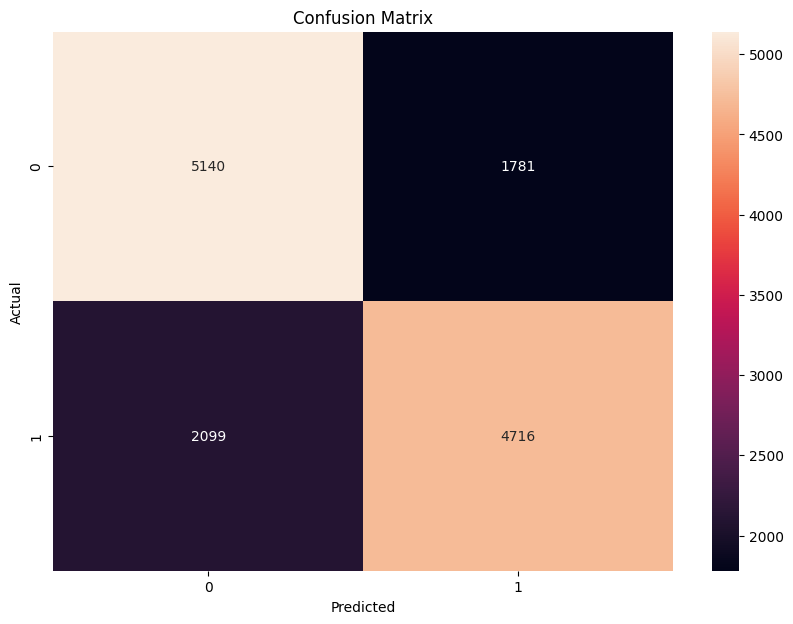

In [55]:

# Assuming y_test and y_train_pred are already defined and contain the true and predicted labels.
cm = confusion_matrix(y_test, y_pred_KNN_grid)

# Create a heatmap with annotations
plt.figure(figsize=(10, 7))  # You can adjust the size as needed
sb.heatmap(cm, annot=True, fmt='d')  # The 'fmt' argument ensures numbers are displayed as integers

# Optional: Add labels for clarity
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()



We improved the recall score of class 1 to 0.69, and decreased the number of false negatives to 2099.

## 5.3 Neural Network

TensorFlow Keras Nerual Network Model is a computational framework for building and training neural networks using TensorFlow's high-level Keras API. The model is typically defined using the Sequential class, allowing for the linear stacking of layers such as Denselayer. This structure supports straightforward implementation of various deep learning architectures, making it suitable for a wide range of tasks from classification to regression.

In [56]:
import tensorflow as tf # Importing TensorFlow library
from tensorflow.keras.models import Sequential # Importing Sequential model
from tensorflow.keras.layers import Dense # Importing Dense layer
tf.keras.backend.clear_session()
model = Sequential() # Creating a Sequential model

# Adding a Dense layer with 10 units and 'relu' activation function as the first layer
model.add(Dense(units=10, activation='relu', input_dim=X_train.shape[1]))

# Adding another Dense layer with 1 unit and 'sigmoid' activation function as the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model with 'binary_crossentropy' loss function and 'adam' optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model on the training data
start_fit_time_Keras = time.time()
model.fit(X_train, y_train, epochs=10, batch_size=32)
end_fit_time_Keras = time.time()
fit_time_Keras = end_fit_time_Keras - start_fit_time_Keras


Epoch 1/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 2s 777us/step - accuracy: 0.6527 - loss: 0.6257
Epoch 2/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.7246 - loss: 0.5547
Epoch 3/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.7267 - loss: 0.5518
Epoch 4/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.7315 - loss: 0.5464
Epoch 5/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.7322 - loss: 0.5443
Epoch 6/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.7275 - loss: 0.5477
Epoch 7/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.7318 - loss: 0.5470
Epoch 8/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.7305 - loss: 0.5454
Epoch 9/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.7333 - loss: 0.5424
Epoch 10/10
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.7341 - loss: 0.5422


In [58]:
# Predicting the Train set results
start_predict_time_Keras= time.time()
y_pred_NN = model.predict(X_test)
y_pred_NN = y_pred_NN.round()
end_predict_time_Keras = time.time()
predict_time_Keras= end_predict_time_Keras - start_predict_time_Keras

430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step


In [59]:
print(classification_report(y_test, y_pred_NN))
print(f"Fit time: {fit_time_Keras:.3f} seconds")
print(f"Predict time: {predict_time_Keras:.3f} seconds")

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6921
           1       0.74      0.71      0.73      6815

    accuracy                           0.73     13736
   macro avg       0.73      0.73      0.73     13736
weighted avg       0.73      0.73      0.73     13736

Fit time: 12.810 seconds
Predict time: 0.431 seconds


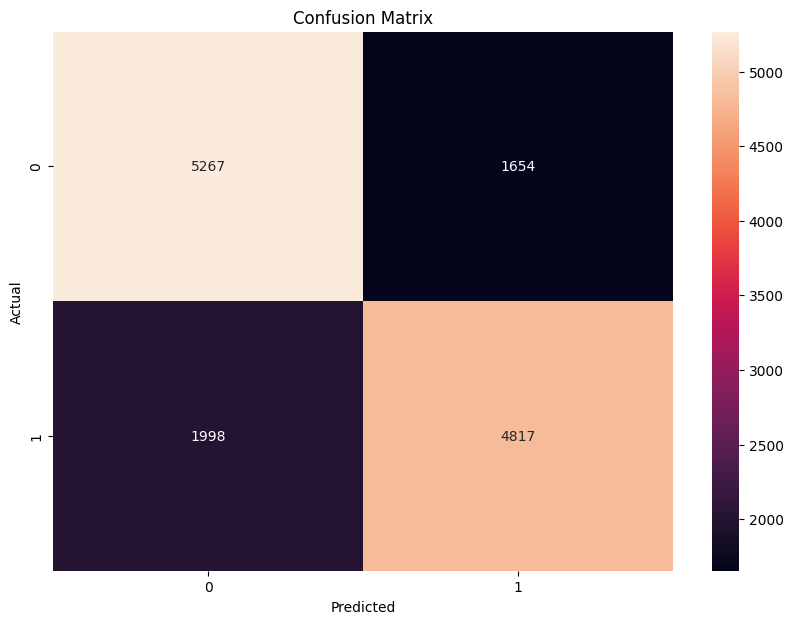

In [60]:
# Assuming y_test and y_train_pred are already defined and contain the true and predicted labels.
cm = confusion_matrix(y_test, y_pred_NN)

# Create a heatmap with annotations
plt.figure(figsize=(10, 7))  # You can adjust the size as needed
sb.heatmap(cm, annot=True, fmt='d')  # The 'fmt' argument ensures numbers are displayed as integers

# Optional: Add labels for clarity
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

The recall score for class 1 is 0.71, with 1998 False Negatives.

## 6. Analysis and Conclusion

Now lets compare the classifiacation reports of our 3 models after KNN and Random forest have been enhanced with grid search.

In [61]:
print("Random Forest: \n")
# Print RF results with timing
print(f"Fit time: {fit_time_RF:.3f} seconds")
print(f"Predict time: {predict_time_RF:.3f} seconds")
print(test_classReport_forest_grid)

print("K-Nearest-Neighbors: \n")
# Print KNN results with timing
print(f"Fit time: {fit_time_KNN:.3f} seconds")
print(f"Predict time: {predict_time_KNN:.3f} seconds")
# Assuming 'y_true' and 'y_pred' are the true and predicted labels
print(classification_report(y_test, y_pred_KNN_grid))

print("Neural Network: \n")
# Print NN results with timing
print(classification_report(y_test, y_pred_NN))
print(f"Fit time: {fit_time_Keras:.3f} seconds")
print(f"Predict time: {predict_time_Keras:.3f} seconds")

Random Forest: 

Fit time: 14.171 seconds
Predict time: 0.680 seconds
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      6921
           1       0.71      0.69      0.70      6815

    accuracy                           0.70     13736
   macro avg       0.70      0.70      0.70     13736
weighted avg       0.70      0.70      0.70     13736

K-Nearest-Neighbors: 

Fit time: 0.126 seconds
Predict time: 1.695 seconds
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      6921
           1       0.73      0.69      0.71      6815

    accuracy                           0.72     13736
   macro avg       0.72      0.72      0.72     13736
weighted avg       0.72      0.72      0.72     13736

Neural Network: 

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6921
           1       0.74      0.71      0.73      6815

    accuracy       

We observe the class 1 recall scores and the number of False Negatives of the 3 models.

1. **Random Forests:** 
    - Recall score: 0.69 
    - False Negatives: 2104
2. **K-Nearest-Neighbors:**
    - Recall score: 0.69
    - False Negatives: 2099
3. **Neural Network:**
    - Recall score: 0.71
    - False Negatives: 1998

Of the 3 models, we observe that Neural Network has the highest recall score and the lowest number of false negatives.

Although the fit time of Neural Network is longer than that of K-Nearest-Neighbors, and its predict time is longer than that of random forest, time is not an important factor for our problem. This is because our priority is to minimise the number of false negatives, and ensure the highest possible number of people with CVD are advised to get a checkup. Thus, we conclude that Neural Network is the best model for our problem.

## 7. Future improvements

We notice that for the dataset we used, there are more patients without CVD than those who have CVD. For future improvements, we can expand the dataset such that patients with CVD makes up at least half of the dataset. 

In addition, the physical activity can afford to be less vague. We can further split physical activity into aerobic and non-aerobic activities, along with the number of hours spent on these activities each week.

Lastly, our dataset seems to be based on patients in Canada. Moving forward, we can create a dataset that is more localized to the context of Singapore to obtain better prediction for the Singapore population.